# EDA Price Runner

**Assignment** 
- Analyze the overall and unit economics of product creation by considering  clicks and click revenues for a given set of products. 
- Present your insights as well as your methodology.
- List potential next steps to refine the current solution.

**Data** 
Given are three datasets: 
- A set of products created in June 2020. 
- Product category and hierarchy structure. 
- Click-out events from Price Runner service to merchants for the period June 2020 to June 2021, for the specific set of products above.


The **product** dataset (`products.csv`) contains the following: 
- `product_id`: Product identifier  
- `category_id`: Category identifier 
- `product_name`: Name of product 
- `product_description`: Product description 
- `creation_time`: Date of creation 


The **hierarchy** dataset (`hiearachies.csv`) contains the following: 
- `parent_hierarchy_id`: Top hierarchy identifier 
- `parent_hierarchy_name`: Top hierarchy name 
- `child_hierarchy_id`: Child hierarchy identifier 
- `child_hierarchy_name`: Child hierarchy name 
- `category_id`: Category identifier 
- `category_name`: Category name 
 
The **clicks** dataset (`clicks.csv`) contains the following: 
- `category_id`: Category identifier 
- `product_id`: Product identifier 
- `click_time`: Time of click-out 
- `click_cost`: Cost for click-out  
- `currency`: Currency of click-out cost


**Questions** 
- How do clicks and click revenue develop over time? 
    - How are the click and revenue distributed over the set of created products? 
    - Does the distribution change over time? 
    - Specifically, how does the share of products that have at least one click develop over time? 
- What is the lifetime value of a product?  
- Is there a pattern between the “age” of a product and the generated click 
revenue?  
- Are there any seasonal patterns to consider? 
- For all the above, are there differences across categories or hierarchies? 
 

In [171]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [172]:
products = pd.read_csv('products.csv')
products.head(3)

,category_id,product_id,product_name,product_description,creation_time
0,cl27,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25
1,cl1394,5223181,TVS Limbo Momento II 8754340 1400x50,"Electric Heating, Timer, Chrome",2020-06-25
2,cl58,5224117,Oakley Holbrook Ignite Fade Collection Polariz...,"Rectangular, Black Frames, Black Lenses, Targe...",2020-06-26


In [173]:
products.creation_time = pd.to_datetime(products.creation_time)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20747 entries, 0 to 20746
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   category_id          20747 non-null  object        
 1   product_id           20747 non-null  int64         
 2   product_name         20747 non-null  object        
 3   product_description  20119 non-null  object        
 4   creation_time        20747 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 810.6+ KB


In [174]:
hierarchy = pd.read_csv('hierarchy.csv')
hierarchy.head(3)

,parent_hierarchy_id,parent_hierarchy_name,child_hierarchy_id,child_hierarchy_name,category_id,category_name
0,t4,Phones & Wearables,t4,Phones & Wearables,cl1,Mobile Phones
1,t2,Computing,t20,Networking,cl9,Mobile Modems
2,t11,Motor Transport,t11,Motor Transport,cl1622,Electric Vehicle Charging


In [175]:
hierarchy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   parent_hierarchy_id    360 non-null    object
 1   parent_hierarchy_name  360 non-null    object
 2   child_hierarchy_id     360 non-null    object
 3   child_hierarchy_name   360 non-null    object
 4   category_id            360 non-null    object
 5   category_name          360 non-null    object
dtypes: object(6)
memory usage: 17.0+ KB


In [176]:
clicks = pd.read_csv('clicks.csv')
clicks.head(3)

,category_id,product_id,click_time,currency,click_cost
0,cl68,5206077,2020-12-29,DKK,2.45
1,cl68,5206077,2021-01-06,SEK,2.20
2,cl68,5206077,2020-12-29,SEK,2.20


In [177]:
clicks.click_time = pd.to_datetime(clicks.click_time)

In [178]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368415 entries, 0 to 2368414
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   category_id  object        
 1   product_id   int64         
 2   click_time   datetime64[ns]
 3   currency     object        
 4   click_cost   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 90.3+ MB


In [179]:
merged_data = pd.merge(products, hierarchy, on='category_id')
merged_data.drop(columns='category_id', inplace=True)
df = pd.merge(merged_data, clicks, on='product_id')
df.head()


,product_id,product_name,product_description,creation_time,parent_hierarchy_id,parent_hierarchy_name,child_hierarchy_id,child_hierarchy_name,category_name,category_id,click_time,currency,click_cost
0,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-03-23,DKK,1.65
1,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-03-28,DKK,1.65
2,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-04-28,DKK,1.65
3,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2020-10-16,DKK,1.85
4,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2020-10-16,DKK,1.40


## How are the click and revenue distributed over the set of created products? 

### Currency conversion

Let's start with converting all currencies to a common base currency - USD, using the exchange rates at the relevant time. This allows for direct comparisons between the values in different currencies.

In [194]:
df.currency = df.currency.replace({'DKK': 0, 'SEK': 1, 'GBP': 2, 'EUR': 3, 'USD': 4})
exchange_rates = {0: 0.15, 1: 0.1, 2: 1.27, 3: 1.09, 4: 1}

# This part uses the apply method to apply a lambda function to each element in the 'currency' column. 
# The lambda function takes a currency code as input and returns the corresponding exchange rate from
# the exchange_rates dictionary. This is essentially performing a currency conversion for each row based on the exchange rates.
df['click_cost_USD'] = df['click_cost'] * df['currency'].apply(lambda currency: exchange_rates[currency])
df.head(3)

,product_id,product_name,product_description,creation_time,parent_hierarchy_id,parent_hierarchy_name,child_hierarchy_id,child_hierarchy_name,category_name,category_id,click_time,currency,click_cost,click_cost_USD
0,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-03-23,0,1.65,0.2475
1,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-03-28,0,1.65,0.2475
2,5223169,Lenovo ThinkPad E15 20RD001CPB,"15.6"" Intel Core i5, 1.6 GHz, 16 GB RAM, 512 G...",2020-06-25,t2,Computing,t22,Computers,Laptops,cl27,2021-04-28,0,1.65,0.2475


Now let's see how clicks and revenue are distributed over the set of created products. 

For now we can group the data by 'product_id' and calculate the **count of clicks**, **total click_cost**, **average click_cost**, and **standard deviation of click_cost** for each product.

In [210]:
clicks_summary = df.groupby('product_id').agg({'click_cost_USD': ['count', 'sum', 'mean', 'std']}).reset_index()
clicks_summary.columns = ['product_id', 'click_count', 'total_click_cost_USD', 'mean_click_cost_USD', 'std_click_cost_USD']
clicks_summary

,product_id,click_count,total_click_cost_USD,mean_click_cost_USD,std_click_cost_USD
0,5206077,91,26.4253,0.290388,0.065215
1,5206078,920,238.1175,0.258823,0.031723
2,5206079,8,2.1475,0.268437,0.025633
3,5206080,46,12.8975,0.280380,0.050848
4,5206081,494,352.8314,0.714234,0.448511
...,...,...,...,...,...
17091,3200001542,1238,229.5950,0.185456,0.030487
17092,3200001543,14,6.5659,0.468993,0.059038
17093,3200001544,205,85.9875,0.419451,0.040211
17094,3200001545,208,43.1000,0.207212,0.015578


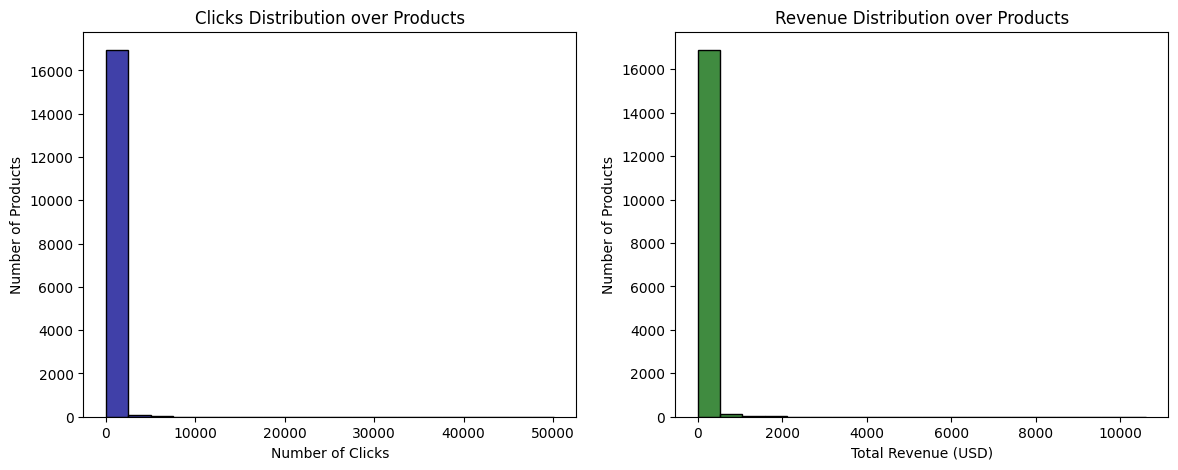

In [217]:
def clicks_destribution(clicks_per_product, revenue_per_product, bins_num):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 5))

    sns.histplot(clicks_per_product, bins=bins_num, ax=axes[0], color='darkblue')
    axes[0].set_title('Clicks Distribution over Products')
    axes[0].set_xlabel('Number of Clicks')
    axes[0].set_ylabel('Number of Products')

    sns.histplot(revenue_per_product, bins=bins_num, ax=axes[1], color = 'darkgreen')
    axes[1].set_title('Revenue Distribution over Products')
    axes[1].set_xlabel('Total Revenue (USD)')
    axes[1].set_ylabel('Number of Products')

    plt.show()

clicks_destribution(clicks_summary.click_count, clicks_summary.total_click_cost_USD, 20)

Result: 
- The plots show that people click only few times on most products, which is expected. Let's see how the plots will look like if we increase the clicks & revenue count to 50, but put a threshold at 2000 and increase the number of bins. 

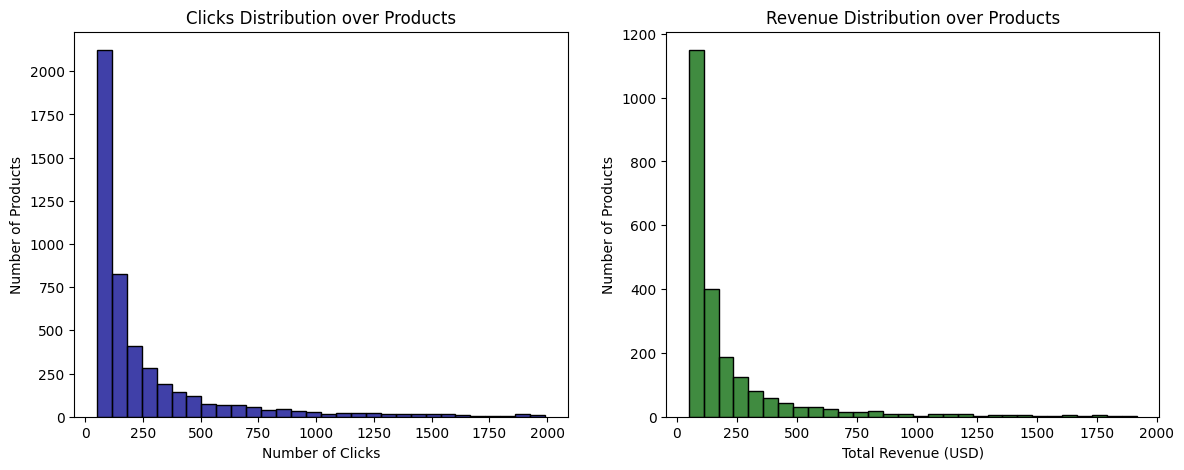

In [218]:
clicks_per_product = clicks_summary.click_count[(clicks_summary.click_count > 50) & (clicks_summary.click_count < 2000)]
revenue_per_product = clicks_summary.total_click_cost_USD[(clicks_summary.total_click_cost_USD > 50) & (clicks_summary.total_click_cost_USD < 2000)]

clicks_destribution(clicks_per_product, revenue_per_product, 30)

Result: 
- Now the distribution is more visible on the plots, but we can still see a drastic difference between the number of clicks in every bin. 

## How do clicks and click revenue develop over time?  

Let's calculate some statistics for clicks per day.

In [227]:
clicks_over_time = df.groupby('click_time').agg({'click_cost_USD': ['count', 'sum', 'mean', 'std']}).reset_index()
clicks_over_time.columns = ['click_time', 'click_count', 'total_click_cost_USD', 'mean_click_cost_USD', 'std_click_cost_USD']
clicks_over_time

,click_time,click_count,total_click_cost_USD,mean_click_cost_USD,std_click_cost_USD
0,2020-06-01,170,48.3330,0.284312,0.114278
1,2020-06-02,493,136.3834,0.276640,0.114651
2,2020-06-03,733,206.9853,0.282381,0.113425
3,2020-06-04,858,240.6301,0.280455,0.146509
4,2020-06-05,1141,308.8931,0.270721,0.145183
...,...,...,...,...,...
390,2021-06-26,4000,1283.2096,0.320802,0.191623
391,2021-06-27,5175,1710.8073,0.330591,0.209136
392,2021-06-28,4903,1625.4921,0.331530,0.203092
393,2021-06-29,4376,1414.9497,0.323343,0.181872


Now let's visualise it.

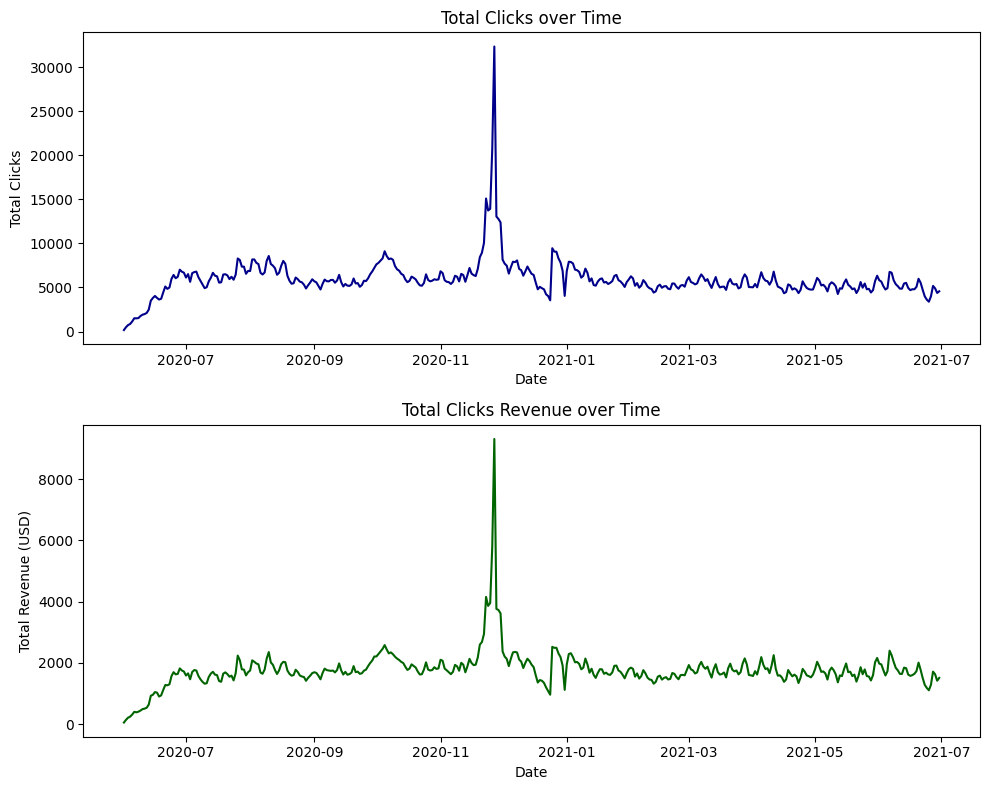

In [283]:
def total_clicks_over_time(data):  
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

    # Number of clicks over time
    sns.lineplot(data=data, x='click_time', y='click_count', ax=axes[0], color='darkblue')
    axes[0].set_title('Total Clicks over Time')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Total Clicks')

    # Revenue in USD over time
    sns.lineplot(data=data, x='click_time', y='total_click_cost_USD', ax=axes[1], color = 'darkgreen')
    axes[1].set_title('Total Clicks Revenue over Time')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Total Revenue (USD)')

    plt.tight_layout()
    plt.show()

total_clicks_over_time(clicks_over_time)

As we can see, the plots look very similar, but the scales are different. Let's see what are the statistics for the column `click_cost_USD`. 

In [184]:
df.click_cost_USD.describe()

count    2.351509e+06
mean     2.969079e-01
std      1.812821e-01
min      1.000000e-03
25%      2.100000e-01
50%      2.750000e-01
75%      3.683000e-01
max      2.043900e+01
Name: click_cost_USD, dtype: float64

Results:

- The value of `std` is pretty low, so most of the numbers are the same (~0.3) in the `click_cost_USD` column. So the plots look almost the same because we sum almost fixed number (~0.3 cost per click) the same amount of times we have clicks per day. It created very similar pattern on the line plot. 

- The biggest spike in November is most likely the Black Friday deals. There are some increases in sales in October and before and after Christmas. 

We can also look at distribution by months.

In [264]:
ordered_months = clicks_over_time.click_time.dt.to_period('M').sort_values().astype('category')
revenue_by_month = clicks_over_time.groupby(ordered_months).agg({'total_click_cost_USD': 'sum'}).reset_index()

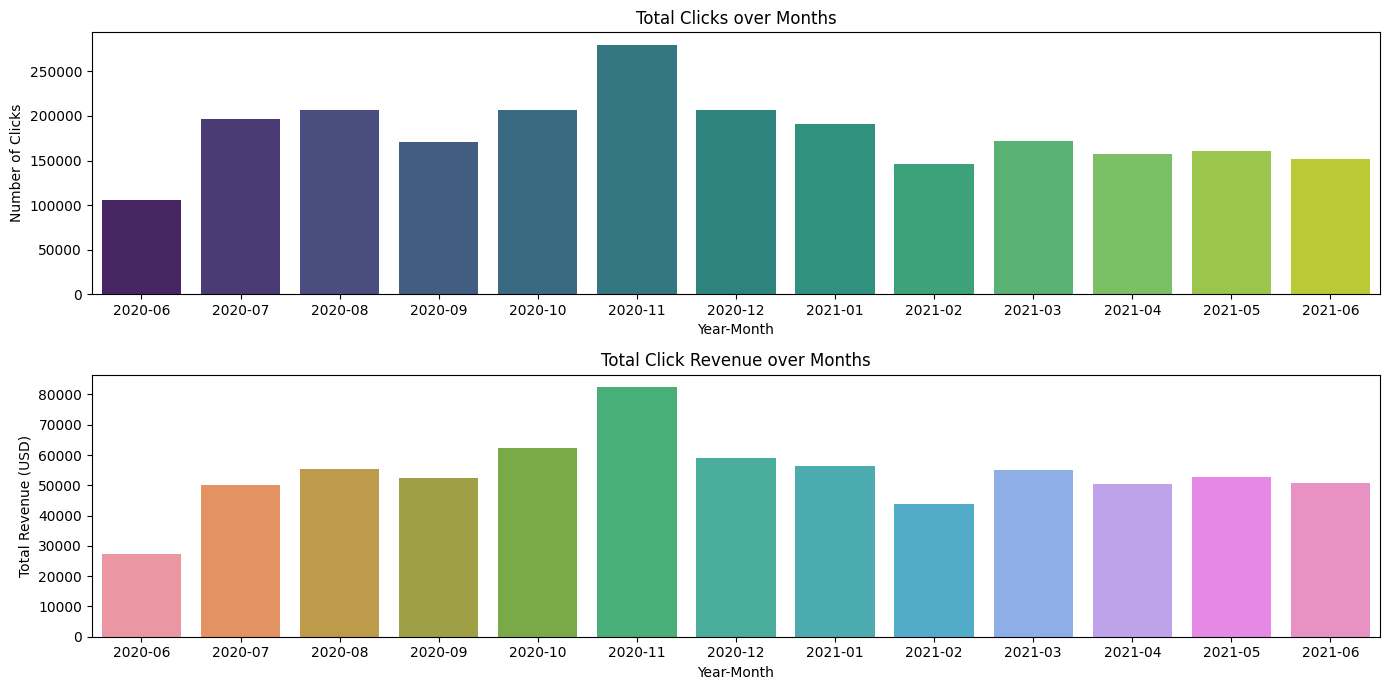

In [265]:
# Changes in Clicks Distribution Over Time
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(14, 7))

# Number of clicks over time
sns.countplot(x=df.click_time.dt.to_period('M').sort_values().astype('category'), palette='viridis', ax=axes[0])
axes[0].set_title('Total Clicks over Months')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Number of Clicks')

# Revenue in USD over time
sns.barplot(x=revenue_by_month.click_time, y=revenue_by_month.total_click_cost_USD, ax=axes[1])
axes[1].set_title('Total Click Revenue over Months')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Total Revenue (USD)')

plt.tight_layout()


## How does the share of products that have at least one click develop over time?

In [338]:
# Find the earliest click for each product
first_click = df[['product_id', 'creation_time', 'click_time']].sort_values(['creation_time', 'click_time']).groupby('product_id').first()

# Find the minimum value of 'creation_time' in the 'first_click'
start_date = first_click['creation_time'].min()
# Find the maximum value of 'click_time' in the original df
end_date = df['click_time'].max()
products_with_clicks_over_time = pd.DataFrame([], columns=['date', 'with_clicks', 'total'])

# Iterate through each day in the range between start_date and end_date.
# For each date, calculate the number of clicks that occurred on or before that date (with_clicks) 
# and the total number of products created on or before that date (total).
for date in (start_date + pd.offsets.Day(i) for i in range((end_date - start_date).days)):
    products_with_clicks_over_time.loc[len(products_with_clicks_over_time)] = [date, sum(first_click['click_time'] <= date), sum(first_click['creation_time'] <= date)]

# Find ratio of products with clicks and total number of products
products_with_clicks_over_time['ratio'] = products_with_clicks_over_time['with_clicks'] / products_with_clicks_over_time['total']
products_with_clicks_over_time

,date,with_clicks,total,ratio
0,2020-06-01,64,739,0.086604
1,2020-06-02,212,1564,0.135550
2,2020-06-03,381,2298,0.165796
3,2020-06-04,546,3106,0.175789
4,2020-06-05,772,3876,0.199174
...,...,...,...,...
389,2021-06-25,17079,17096,0.999006
390,2021-06-26,17083,17096,0.999240
391,2021-06-27,17086,17096,0.999415
392,2021-06-28,17088,17096,0.999532


<Axes: xlabel='date', ylabel='with_clicks'>

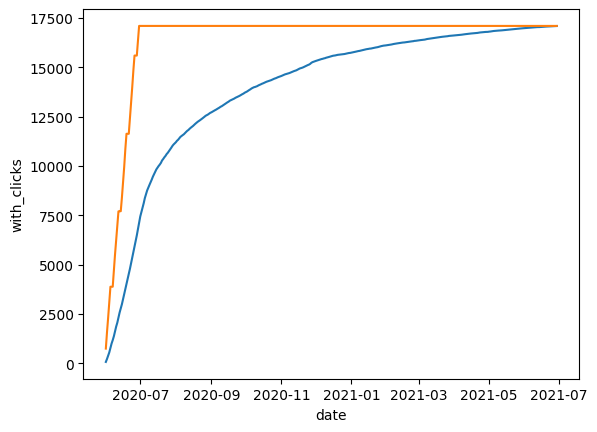

In [336]:
sns.lineplot(products_with_clicks_over_time, x='date', y='with_clicks')
sns.lineplot(products_with_clicks_over_time, x='date', y='total')

<Axes: xlabel='date', ylabel='ratio'>

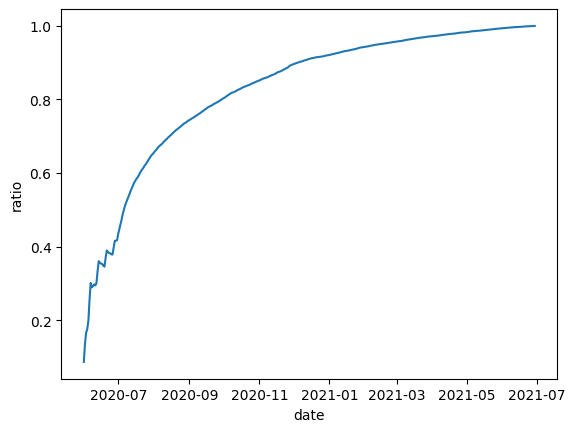

In [337]:
sns.lineplot(products_with_clicks_over_time, x='date', y='ratio')

In [349]:
day_click = df[['product_id', 'creation_time', 'click_time']].sort_values(['creation_time', 'click_time']).groupby(['product_id', 'click_time']).first().reset_index()
products_with_clicks_on_a_day = pd.DataFrame([], columns=['date', 'with_clicks', 'total'])
for date in (start_date + pd.offsets.Day(i) for i in range((end_date - start_date).days)):
    products_with_clicks_on_a_day.loc[len(products_with_clicks_on_a_day)] = [date, sum(day_click['click_time'] == date), sum(first_click['creation_time'] <= date)]
products_with_clicks_on_a_day['ratio'] = products_with_clicks_on_a_day['with_clicks'] / products_with_clicks_on_a_day['total']
products_with_clicks_on_a_day

,date,with_clicks,total,ratio
0,2020-06-01,64,739,0.086604
1,2020-06-02,178,1564,0.113811
2,2020-06-03,254,2298,0.110531
3,2020-06-04,317,3106,0.102061
4,2020-06-05,426,3876,0.109907
...,...,...,...,...
389,2021-06-25,1124,17096,0.065746
390,2021-06-26,1384,17096,0.080955
391,2021-06-27,1488,17096,0.087038
392,2021-06-28,1464,17096,0.085634


<Axes: xlabel='date', ylabel='with_clicks'>

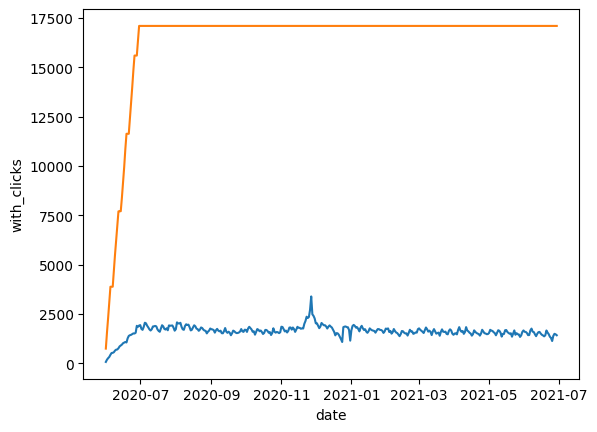

In [350]:
sns.lineplot(products_with_clicks_on_a_day, x='date', y='with_clicks')
sns.lineplot(products_with_clicks_on_a_day, x='date', y='total')


<Axes: xlabel='date', ylabel='ratio'>

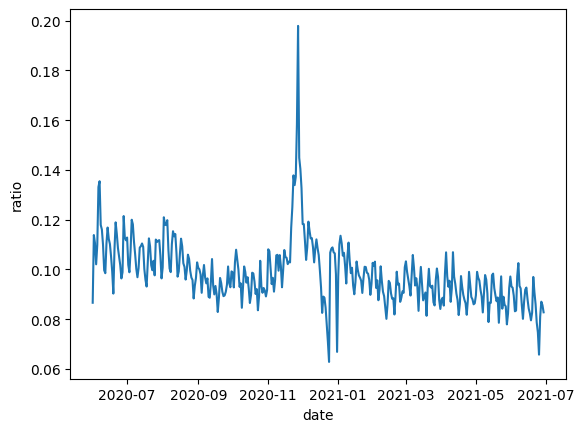

In [344]:
sns.lineplot(products_with_clicks_on_a_day, x='date', y='ratio')

In [206]:
# The use of 'first' in the agg function is to handle cases where the 'category_name' and 'product_name' values 
# are the same for all rows within each group (grouped by 'product_id'). When you apply an aggregation function 
# like sum, mean, or std to these columns, Pandas requires you to specify how to handle non-numeric columns. 
# The 'first' function is a way to tell Pandas to take the first non-null value within each group for these non-numeric columns.

# Clicks summary
clicks_summary = df.groupby('product_id').agg({'click_cost_USD': ['count', 'sum', 'mean', 'std'],
                                                        'category_name': 'first', 'product_name':'first'}).reset_index()

# Flatten multi-level columns
clicks_summary.columns = ['product_id', 'click_count', 'click_sum', 'click_mean', 'click_std', 'category_name', 'product_name']
clicks_summary

,product_id,click_count,click_sum,click_mean,click_std,category_name,product_name
0,5206077,91,26.4253,0.290388,0.065215,Kettles,Nedis KAWK300E
1,5206078,920,238.1175,0.258823,0.031723,Tumble Dryers,Bosch WTW87400SN White
2,5206079,8,2.1475,0.268437,0.025633,Tumble Dryers,Bosch WTW87500SN White
3,5206080,46,12.8975,0.280380,0.050848,Kettles,Nedis KAWK320EGS
4,5206081,494,352.8314,0.714234,0.448511,Tumble Dryers,Bosch WTN85201GB White
...,...,...,...,...,...,...,...
17091,3200001542,1238,229.5950,0.185456,0.030487,Soundbars & Home Cinema Systems,Samsung HW-Q66T
17092,3200001543,14,6.5659,0.468993,0.059038,Landline Phones,Panasonic KX-TGH726 Sextet
17093,3200001544,205,85.9875,0.419451,0.040211,Basketball,Stanlord Pro
17094,3200001545,208,43.1000,0.207212,0.015578,Soundbars & Home Cinema Systems,LG SN6Y


In [35]:
clicks_summary.nlargest(columns = 'click_count', n=10)

,product_id,click_count,click_sum,click_mean,click_std,category_name,product_name
11387,5220111,50115,10600.3975,0.211521,0.073459,PlayStation 4 Games,FIFA 21
12,5206089,33055,8131.6459,0.246004,0.134614,Mobile Phones,Samsung Galaxy A21s 3GB RAM 32GB
814,5207012,20532,8622.9395,0.419976,0.194134,Swimming Pools & Accessories,Exit Round Stone Pool Ø3.6x0.76m
10075,5218507,20015,4308.8705,0.215282,0.066223,Monitors,Samsung Odyssey G7 C27G75TQSU
1682,5208062,17562,6085.2884,0.346503,0.114191,Toys,Lego Technic Lamborghini Sian FKP 37 42115
2656,5209273,15114,3051.8130,0.201920,0.056324,Monitors,AOC C27G2ZU
10650,5219194,15074,4680.8071,0.310522,0.224330,TVs,Sony KD-65XH9005
6115,5213618,14816,9327.7879,0.629575,0.490660,TVs,LG 43UN73006
10648,5219191,14744,4767.4419,0.323348,0.246817,TVs,Sony KD-55XH9005
16451,5226564,13327,4976.8000,0.373437,0.027735,Hot Tubs,Neptun Hot Tub Spa Black Edition Kungsholmen
